# Feature Selection

## 1. Import the packages

In [1]:
#importing libraries
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
%matplotlib inline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## 2. Road the raw data

In [2]:
warnings.filterwarnings("ignore")
data = pd.read_csv("date(deleted_singular_value).csv")
X = data.iloc[:,1:-1]
y = data.iloc[:,-1] 

In [84]:
# imputer = SimpleImputer(missing_values=20, strategy="most_frequent")

# data = imputer.fit_transform(data)


In [3]:
X

,Author,URL_Domain,Web_Depth,Date,PageRank_Score,Number_of_reference,Number_of_external_link,Count_Word,Tf_Score,Bm25_Score
0,1,0,1,2018.00000,2.530000e-10,0,134,146,0.242251,0.307061
1,0,1,1,2018.00000,8.160000e-09,0,28,96,0.000000,0.000000
2,1,0,1,2014.00000,1.120000e-09,0,6,122,0.000000,0.000000
3,0,0,1,2016.80882,1.310000e-10,0,15,839,0.410742,0.547826
4,1,0,1,2019.00000,1.080000e-08,0,15,199,0.050100,0.000000
5,0,1,1,2018.00000,1.050000e-08,1,43,340,0.148460,0.242805
6,0,0,1,2009.00000,2.380000e-09,0,23,152,0.404232,0.343252
7,0,0,1,2016.80882,1.370000e-09,1,82,189,0.246529,0.276072
8,1,0,2,2019.00000,1.040000e-09,1,299,1185,0.532134,1.939611
9,0,1,1,2016.00000,1.140000e-10,1,73,1436,0.509366,0.929497


### 2.1 Data Cleaning

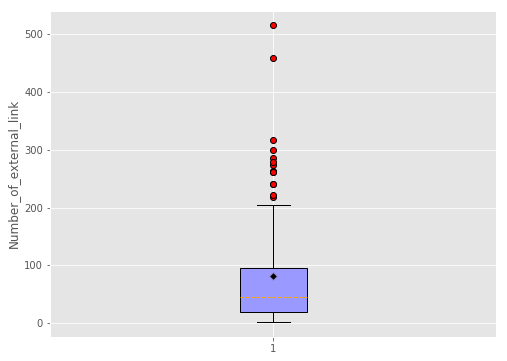

In [20]:
def Box_plot(x):
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.rcParams['axes.unicode_minus'] = False



    plt.boxplot(x = data.Number_of_external_link, 
                patch_artist=True, 
                showmeans=True, 
                boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色
                medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色

    plt.ylabel("Number_of_external_link")  
    plt.tick_params(top='off', right='off')
    plt.show()
Box_plot(data)


## 3. Feature Selection Methods

### 3.1 Univariate Selection

In [5]:
def Univariate(X,y):
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']  #naming the dataframe columns
    print(featureScores.nlargest(10,'Score'))  #print 10 best features
    plt.show()
Univariate(X,y)

                  Features         Score
7               Count_Word  22615.496317
6  Number_of_external_link   1167.389551
5      Number_of_reference    287.793152
8                 Tf_Score     61.735610
9               Bm25_Score     32.205544
0                   Author      8.846884
1               URL_Domain      4.259048
2                Web_Depth      1.365027
3                     Date      0.006802
4           PageRank_Score      0.000001


### 3.2 Importance of Feature Selection

[0.05723286 0.03171081 0.0175285  0.08683207 0.         0.10563266
 0.1300524  0.14600888 0.27815256 0.14684926]
Author                     0.057233
URL_Domain                 0.031711
Web_Depth                  0.017529
Date                       0.086832
PageRank_Score             0.000000
Number_of_reference        0.105633
Number_of_external_link    0.130052
Count_Word                 0.146009
Tf_Score                   0.278153
Bm25_Score                 0.146849
dtype: float64


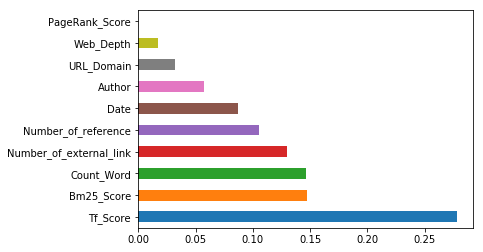

In [6]:
def Importance(X,y):
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    print(feat_importances)
    plt.show()
Importance(X,y)

### 3.3 Filter Methods

#### 3.3.1 Pearson’s Correlation

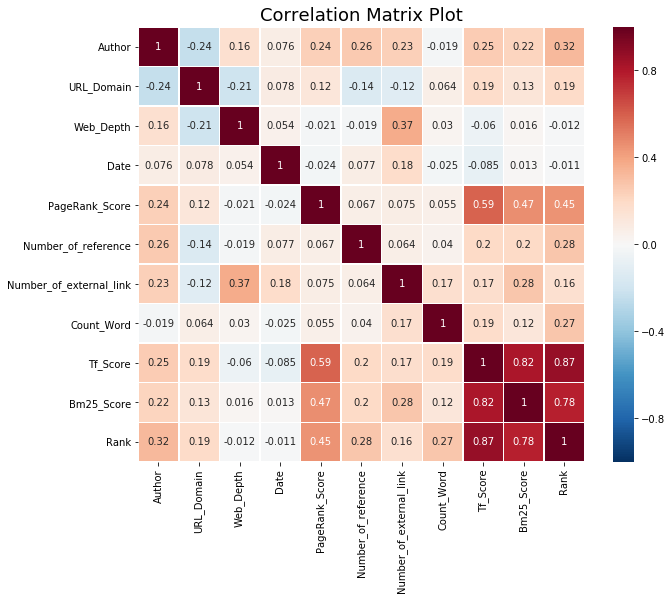

Author                     0.324999
URL_Domain                 0.192167
Web_Depth                  0.011827
Date                       0.011220
PageRank_Score             0.452569
Number_of_reference        0.276445
Number_of_external_link    0.157041
Count_Word                 0.273473
Tf_Score                   0.874607
Bm25_Score                 0.775114
Rank                       1.000000
Name: Rank, dtype: float64
Author                 0.324999
PageRank_Score         0.452569
Number_of_reference    0.276445
Count_Word             0.273473
Tf_Score               0.874607
Bm25_Score             0.775114
Rank                   1.000000
Name: Rank, dtype: float64


In [8]:
def Correlation(dataset):
    corr = dataset.corr()
    plt.figure(figsize=(10, 8))
    plt.title("Correlation Matrix Plot",fontsize= 18)
    heatmap = sns.heatmap(corr, annot=True, linewidths=0.5,vmin=-1, cmap="RdBu_r")
    plt.show()
    cor_target = abs(corr["Rank"])
    #Selecting highly correlated features
    print(cor_target)
    relevant_features = cor_target[cor_target>0.27]
    print(relevant_features)
#     print(dataset[["Bm25_Score","Tf_Score"]].corr())
#     print(dataset[["Tf_Score","PageRank_Score"]].corr())
Correlation(data)

### 3.4 Wrapper Methods

#### 3.4.1 Backward Elimination

In [10]:
def pvalue(X,y):
    X_1 = sm.add_constant(X)
    #Fitting sm.OLS model
    model = sm.OLS(y,X_1).fit()
    print(model.pvalues)
pvalue(X,y)

const                      0.970241
Author                     0.002446
URL_Domain                 0.023837
Web_Depth                  0.567703
Date                       0.959138
PageRank_Score             0.394317
Number_of_reference        0.030638
Number_of_external_link    0.165136
Count_Word                 0.004267
Tf_Score                   0.000001
Bm25_Score                 0.001110
dtype: float64


In [50]:
def Backward_Elimination(X,y):
    cols = list(X.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    print(selected_features_BE)
Backward_Elimination(X,y)

['Author', 'Count_Word', 'Tf_Score', 'Bm25_Score']


#### 3.4.2 RFE (Recursive Feature Elimination)

Optimal number of features: 6
[3 5 6 7 8 9]
[0 1 2 4]


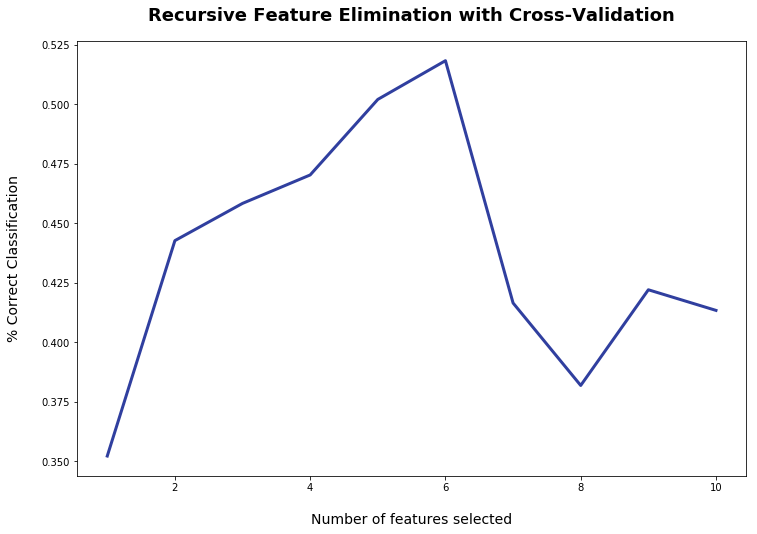

In [11]:
def high_features(X,target):
    rfc = RandomForestClassifier(random_state=101)
    rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
    rfecv.fit(X, target)
    print('Optimal number of features: {}'.format(rfecv.n_features_))
    print(np.where(rfecv.support_ == True)[0])
    print(np.where(rfecv.support_ == False)[0])
    plt.figure(figsize=(12, 8))
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

    plt.show()

high_features(X,y)

### 3.4 Embedded Method

In [11]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.799104
Best score using built-in LassoCV: 0.528650


In [12]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 6 variables


In [13]:
imp_coef = coef.sort_values()
print(imp_coef)

Author                     0.000000
URL_Domain                 0.000000
Web_Depth                 -0.000000
Date                      -0.000000
PageRank_Score             0.000000
Bm25_Score                 0.000000
Count_Word                 0.000232
Number_of_external_link    0.000923
Number_of_reference        0.035746
Tf_Score                   0.624334
dtype: float64
